# Seed ÏÉùÏÑ± ÌôïÏù∏Ïö© ÌÖåÏä§Ìä∏ ÎÖ∏Ìä∏Î∂Å
http://4.230.26.44:8888

In [1]:
import os
import sys

sys.path.append("/app")
from src.utils.spark_builder import get_spark_session
from pyspark.sql import functions as F

os.environ[
    "PYSPARK_SUBMIT_ARGS"
] = """
    --conf spark.cores.max=2
    --conf spark.executor.memory=8g
    --conf spark.app.name=GDELT_dbt_test
    pyspark-shell
"""

# Spark ÏÑ∏ÏÖò ÏÉùÏÑ±
spark = get_spark_session("GDELT_dbt_test", "spark://spark-master:7077")
print("‚úÖ Spark ÏÑ∏ÏÖò ÏÉùÏÑ± ÏôÑÎ£å")

25/09/25 14:16:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/25 14:16:52 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


‚úÖ Spark ÏÑ∏ÏÖò ÏÉùÏÑ± ÏôÑÎ£å


In [2]:
# Spark MetastoreÏóê Ï°¥Ïû¨ÌïòÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§(Ïä§ÌÇ§Îßà) Î™©Î°ùÏùÑ ÌôïÏù∏Ìï©ÎãàÎã§.
print("üìñ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§(Ïä§ÌÇ§Îßà) Î™©Î°ù:")
spark.sql("SHOW DATABASES").show()

üìñ ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§(Ïä§ÌÇ§Îßà) Î™©Î°ù:
+------------+
|   namespace|
+------------+
|     default|
|    gold_dev|
|   gold_prod|
|    seed_dev|
|   seed_prod|
|      silver|
| staging_dev|
|staging_prod|
+------------+



In [3]:
# dbt seed ÎòêÎäî dbt runÏúºÎ°ú ÏÉùÏÑ±Îêú ÌÖåÏù¥Î∏î ÌôïÏù∏
print("üìú '_dev' Ïä§ÌÇ§ÎßàÏùò ÌÖåÏù¥Î∏î Î™©Î°ù:")
spark.sql("SHOW TABLES IN seed_dev").show()
spark.sql("SHOW TABLES IN staging_dev").show()
spark.sql("SHOW TABLES IN gold_dev").show()

üìú '_dev' Ïä§ÌÇ§ÎßàÏùò ÌÖåÏù¥Î∏î Î™©Î°ù:


25/09/25 14:02:46 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


+---------+--------------------+-----------+
|namespace|           tableName|isTemporary|
+---------+--------------------+-----------+
| seed_dev|actor_ethnic_grou...|      false|
| seed_dev|actor_organizatio...|      false|
| seed_dev|actor_religion_codes|      false|
| seed_dev|    actor_role_codes|      false|
| seed_dev|  event_detail_codes|      false|
| seed_dev|event_quad_class_...|      false|
| seed_dev|    event_root_codes|      false|
| seed_dev|       geo_adm_codes|      false|
| seed_dev|   geo_country_codes|      false|
| seed_dev|      geo_type_codes|      false|
+---------+--------------------+-----------+



+-----------+--------------------+-----------+
|  namespace|           tableName|isTemporary|
+-----------+--------------------+-----------+
|staging_dev|stg_actors_descri...|      false|
|staging_dev|stg_gkg_detailed_...|      false|
|staging_dev|    stg_seed_mapping|      false|
+-----------+--------------------+-----------+

+---------+--------------------+-----------+
|namespace|           tableName|isTemporary|
+---------+--------------------+-----------+
| gold_dev|gold_daily_detail...|      false|
| gold_dev|gold_daily_events...|      false|
| gold_dev|gold_near_realtim...|      false|
| gold_dev|  gold_superset_view|      false|
+---------+--------------------+-----------+



### Seed ÌôïÏù∏ Î∞è ÌÖåÏù¥Î∏î Í¥ÄÎ¶¨

In [ ]:
# Seed ÌÖåÏù¥Î∏î(Ï¥ù 10Í∞ú)Ïùò ÏÉòÌîå Îç∞Ïù¥ÌÑ∞Î•º 5Í∞úÏî© Ï∂úÎ†•ÌïòÏó¨ ÎÇ¥Ïö© ÌôïÏù∏
seed_tables = [
    "actor_ethnic_group_codes",
    "actor_organization_codes",
    "actor_religion_codes",
    "actor_role_codes",
    "event_root_codes",
    "event_detail_codes",
    "event_quad_class_codes",
    "geo_adm_codes",
    "geo_country_codes",
    "geo_type_codes",
]

for table in seed_tables:
    print(f"\n üîç {table} ÌÖåÏù¥Î∏î ÏÉòÌîå Îç∞Ïù¥ÌÑ∞")
    try:
        spark.sql(f"SELECT * FROM seed_dev.{table} LIMIT 5").show(truncate=False)
    except Exception as e:
        print(f"‚ùå ÌÖåÏù¥Î∏î Ï°∞Ìöå Ï§ë, Ïò§Î•ò Î∞úÏÉù: {e}")

ÏÉùÏÑ±Îêú ÌÖåÏù¥Î∏îÏùÑ ÏÇ≠Ï†úÌï† Í≤ΩÏö∞, ÏïÑÎûò ÏΩîÎìúÏóê Ìï¥Îãπ Ïä§ÌÇ§ÎßàÏôÄ "ÏÇ≠Ï†úÌï† ÌÖåÏù¥Î∏îÎ™Ö"ÏùÑ ÏàòÏ†ïÌïòÏó¨ Ïã§Ìñâ

In [ ]:
# ÏÇ≠Ï†úÌï† ÌÖåÏù¥Î∏î Ïù¥Î¶Ñ Î™©Î°ù
tables_to_drop = [
    # "[ÏÇ≠Ï†úÌï† seed ÌÖåÏù¥Î∏îÎ™Ö]"
    "gold_events_by_category_daily"
]
print("üóëÔ∏è Í∏∞Ï°¥ ÌÖåÏù¥Î∏î ÏÇ≠Ï†úÎ•º ÏãúÏûëÌï©ÎãàÎã§.")

for table_name in tables_to_drop:
    try:
        spark.sql(f"DROP TABLE IF EXISTS gold_dev.{table_name}")
        print(f"  - ÌÖåÏù¥Î∏î 'gold_dev.{table_name}' ÏÇ≠Ï†ú ÏôÑÎ£å.")
    except Exception as e:
        print(f"  - ÌÖåÏù¥Î∏î 'gold_dev.{table_name}' ÏÇ≠Ï†ú Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

print("\n‚úÖ ÌÖåÏù¥Î∏î ÏÇ≠Ï†ú ÏûëÏóÖÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

# ÏÇ≠Ï†ú ÌõÑ ÌÖåÏù¥Î∏î Î™©Î°ùÏùÑ Îã§Ïãú ÌôïÏù∏ÌïòÏó¨ Íπ®ÎÅóÌï¥Ï°åÎäîÏßÄ ÌôïÏù∏
print("üìú ÌòÑÏû¨ 'gold_dev' Ïä§ÌÇ§ÎßàÏùò ÌÖåÏù¥Î∏î Î™©Î°ù:")
spark.sql("SHOW TABLES IN gold_dev").show()

### Staging Ìè¥ÎçîÏùò SQL ÌååÏùºÏùÑ dbt runÌïú Í≤∞Í≥º ÌôïÏù∏

In [6]:
# stg_seed_mapping Í≤∞Í≥º ÌôïÏù∏
print("ü•à [stg_seed_mapping] Î∑∞")
spark.sql("SELECT * FROM staging_dev.stg_seed_mapping").show(truncate=False)

ü•à [stg_seed_mapping] Î∑∞


25/09/25 13:57:15 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/09/25 13:57:21 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---------------+----------+-------------+-------------------+------------------------+----------+-------------+---------------+------------+-----------+------------+-----------------+-----------+--------------------+--------------------------+--------------------------+--------------------------+----------------------+---------------------------+----------------+------------------+-----------------------+--------------+-------------------+-------------------+---------------------------------------------------+-------------------------+--------------------------------------------------------+-------------------------+--------------+---------------+-----------+-------------+--------------------------+----------------------------+--------------------------+----------------------+---------------------------+----------------+------------------+-----------------------+--------------+-------------------+------------------+---------------------------------------------------+------------------

In [7]:
# stg_actors_description Í≤∞Í≥º ÌôïÏù∏
print("ü•à [stg_actors_description] Î∑∞")
spark.sql(
    "SELECT * FROM staging_dev.stg_actors_description WHERE actor_full_description IS NULL"
).show(truncate=False)

ü•à [stg_actors_description] Î∑∞


+----------+----------------------+
|actor_code|actor_full_description|
+----------+----------------------+
+----------+----------------------+



In [8]:
# stg_gkg_detailed_events Í≤∞Í≥º ÌôïÏù∏
print("ü•à [stg_gkg_detailed_events] Î∑∞")
spark.sql("SELECT * FROM staging_dev.stg_gkg_detailed_events").show(truncate=False)

ü•à [stg_gkg_detailed_events] Î∑∞


+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+----------------+----------+----------------+------------------+-------+-------------------+
|global_event_id|event_date|source_url                                                                                                                                        |mention_source_name|mention_doc_tone|v2_persons|v2_organizations|v2_enhanced_themes|amounts|processed_at       |
+---------------+----------+--------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+----------------+----------+----------------+------------------+-------+-------------------+
|1264660563     |2025-09-23|https://www.birminghamtimes.com/2025/09/mackenzie-scott-gives-70m-to-uncf-to-financially-strengthen-hbcus/  

### Marts Ìè¥ÎçîÏùò SQL ÌååÏùºÏùÑ dbt runÌïú Í≤∞Í≥º ÌôïÏù∏

In [9]:
# 15Î∂ÑÎßàÎã§ ÏóÖÎç∞Ïù¥Ìä∏) gdelt_events Îç∞Ïù¥ÌÑ∞ÎßåÏùÑ ÏÇ¨Ïö©ÌïòÏó¨, ÎåÄÏãúÎ≥¥ÎìúÏùò ÌïµÏã¨ KPIÎ•º Îπ†Î•¥Í≤å ÏßëÍ≥Ñ
print("ü•á [gold_near_realtime_summary] Î∑∞")
spark.sql("SELECT * FROM gold_dev.gold_near_realtime_summary").show(truncate=False)

ü•á [gold_near_realtime_summary] Î∑∞


+----------+-------------------------+--------------------------------------------------------+-------------------------+-----------+--------------------+--------------------+--------------+-------------+--------------+-----------------------+--------------------+-------------------+-------------------+-------------------+--------------------------------------------------------------------------------------------+
|event_date|mp_action_geo_country_iso|mp_action_geo_country_eng                               |mp_action_geo_country_kor|event_count|avg_goldstein_scale |avg_tone            |total_mentions|total_sources|total_articles|count_cooperation_event|count_conflict_event|count_anomaly_event|risk_score_daily   |processed_at       |daily_tone_summary                                                                          |
+----------+-------------------------+--------------------------------------------------------+-------------------------+-----------+--------------------+----------

In [3]:
# 1Ïùº ÎßàÎã§ ÏóÖÎç∞Ïù¥Ìä∏) Î™®Îì† Staging Î™®Îç∏Îì§ÏùÑ Ï°∞Ïù∏ÌïòÍ≥†, Ïä§ÌÜ†Î¶¨ Î∞è KPI ÌååÏÉù Ïª¨ÎüºÏùÑ ÏÉùÏÑ±ÌïòÎäî ÏÉÅÏÑ∏ Ïù¥Î≤§Ìä∏ ÌÖåÏù¥Î∏î
print("ü•á [gold_daily_detailed_events] Î∑∞")
spark.sql("SELECT * FROM gold_dev.gold_daily_detailed_events").show(truncate=False)
# spark.sql("SELECT actor1_info, actor2_info, simple_story, rich_story, headline_story, event_summary, tone_story FROM gold_dev.gold_daily_detailed_events WHERE actor1_info IS NULL").show(truncate=False)

ü•á [gold_daily_detailed_events] Î∑∞


25/09/25 15:08:19 WARN RetryingMetaStoreClient: MetaStoreClient lost connection. Attempting to reconnect (1 of 1) after 1s. getDatabase
org.apache.thrift.transport.TTransportException: java.net.SocketException: Connection reset
	at org.apache.thrift.transport.TIOStreamTransport.read(TIOStreamTransport.java:129)
	at org.apache.thrift.transport.TTransport.readAll(TTransport.java:86)
	at org.apache.thrift.protocol.TBinaryProtocol.readAll(TBinaryProtocol.java:425)
	at org.apache.thrift.protocol.TBinaryProtocol.readI32(TBinaryProtocol.java:321)
	at org.apache.thrift.protocol.TBinaryProtocol.readMessageBegin(TBinaryProtocol.java:225)
	at org.apache.thrift.TServiceClient.receiveBase(TServiceClient.java:77)
	at org.apache.hadoop.hive.metastore.api.ThriftHiveMetastore$Client.recv_get_database(ThriftHiveMetastore.java:782)
	at org.apache.hadoop.hive.metastore.api.ThriftHiveMetastore$Client.get_database(ThriftHiveMetastore.java:769)
	at org.apache.hadoop.hive.metastore.HiveMetaStoreClient.getData

+---------------+----------+-------------+-------------------+-------------------------+----------+-------------+---------------+------------+-----------+------------+-----------------+-----------+--------------------+--------------------------+--------------------------+--------------------------+----------------------+---------------------------+----------------+------------------+-----------------------+--------------+-------------------+------------------+-----------------------------------------------+-------------------------+----------------------------+-------------------------+--------------+---------------+-----------+---------------+--------------------------+----------------------------+--------------------------+----------------------+---------------------------+----------------+------------------+-----------------------+--------------+-------------------+------------------+------------------------------------------------+-----------------------+-------------------------+-

25/09/25 16:17:59 WARN TransportChannelHandler: Exception in connection from spark-master/10.0.1.237:7077
java.net.SocketException: Connection reset
	at java.base/sun.nio.ch.SocketChannelImpl.throwConnectionReset(SocketChannelImpl.java:394)
	at java.base/sun.nio.ch.SocketChannelImpl.read(SocketChannelImpl.java:426)
	at io.netty.buffer.PooledByteBuf.setBytes(PooledByteBuf.java:259)
	at io.netty.buffer.AbstractByteBuf.writeBytes(AbstractByteBuf.java:1132)
	at io.netty.channel.socket.nio.NioSocketChannel.doReadBytes(NioSocketChannel.java:357)
	at io.netty.channel.nio.AbstractNioByteChannel$NioByteUnsafe.read(AbstractNioByteChannel.java:151)
	at io.netty.channel.nio.NioEventLoop.processSelectedKey(NioEventLoop.java:788)
	at io.netty.channel.nio.NioEventLoop.processSelectedKeysOptimized(NioEventLoop.java:724)
	at io.netty.channel.nio.NioEventLoop.processSelectedKeys(NioEventLoop.java:650)
	at io.netty.channel.nio.NioEventLoop.run(NioEventLoop.java:562)
	at io.netty.util.concurrent.SingleThr

In [4]:
df = spark.table("gold_dev.gold_daily_events_category")
row_count = df.count()
col_count = len(df.columns)
print(f" - Row : {row_count:,} Í∞ú")
print(f" - Column : {col_count} Í∞ú")

spark.sql(
    "SELECT * FROM gold_dev.gold_daily_events_category ORDER BY event_date, mp_action_geo_country_iso ASC"
).show(truncate=False)

25/09/25 14:03:03 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/09/25 14:03:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


 - Row : 8,501 Í∞ú
 - Column : 8 Í∞ú


+----------+-------------------------+-------------------------+-------------------------+-------------+-------------------+-----------+-------------------+
|event_date|mp_action_geo_country_iso|mp_action_geo_country_eng|mp_action_geo_country_kor|mp_quad_class|mp_event_categories|event_count|processed_at       |
+----------+-------------------------+-------------------------+-------------------------+-------------+-------------------+-----------+-------------------+
|2024-09-23|AFG                      |Afghanistan              |ÏïÑÌîÑÍ∞ÄÎãàÏä§ÌÉÑ             |Î¨ºÎ¶¨Ï†Å Í∞àÎì±  |Ï†ÑÌà¨               |1          |2025-09-23 11:45:00|
|2024-09-23|AFG                      |Afghanistan              |ÏïÑÌîÑÍ∞ÄÎãàÏä§ÌÉÑ             |Ïñ∏Ïñ¥Ï†Å ÌòëÎ†•  |Í≥µÍ∞ú ÏÑ±Î™Ö Î∞úÌëú     |2          |2025-09-23 09:30:00|
|2024-09-23|AFG                      |Afghanistan              |ÏïÑÌîÑÍ∞ÄÎãàÏä§ÌÉÑ             |Ïñ∏Ïñ¥Ï†Å ÌòëÎ†•  |ÌòëÏùò               |4          |2025-09-23 23:45:00|
|2024-09-23|ARE

In [5]:
df = spark.table("gold_dev.gold_daily_actor_network")
row_count = df.count()
col_count = len(df.columns)
print(f" - Row : {row_count:,} Í∞ú")
print(f" - Column : {col_count} Í∞ú")

spark.sql(
    "SELECT * FROM gold_dev.gold_daily_actor_network ORDER BY event_date ASC"
).show(truncate=False)

25/09/26 00:46:25 WARN DeltaLog: Change in the table id detected while updating snapshot. 
Previous snapshot = Snapshot(path=s3a://warehouse/gold_dev/gold_daily_actor_network/_delta_log, version=0, metadata=Metadata(8f317bdd-5100-4514-86d5-dae3f8a34fb5,null,null,Format(parquet,Map()),{"type":"struct","fields":[{"name":"event_date","type":"date","nullable":true,"metadata":{}},{"name":"actor1_country_iso","type":"string","nullable":true,"metadata":{}},{"name":"actor1_country_eng","type":"string","nullable":true,"metadata":{}},{"name":"actor1_country_kor","type":"string","nullable":true,"metadata":{}},{"name":"actor1_geo_lat","type":"double","nullable":true,"metadata":{}},{"name":"actor1_geo_long","type":"double","nullable":true,"metadata":{}},{"name":"actor2_country_iso","type":"string","nullable":true,"metadata":{}},{"name":"actor2_country_eng","type":"string","nullable":true,"metadata":{}},{"name":"actor2_country_kor","type":"string","nullable":true,"metadata":{}},{"name":"actor2_geo_l

 - Row : 1,000 Í∞ú
 - Column : 17 Í∞ú


+----------+------------------+--------------------------------------------------------+----------------------+--------------+---------------+------------------+--------------------------------------------------------+------------------+--------------+---------------+-----------+-----------------+-------------------+---------------------------------------------+----------+-------------+
|event_date|actor1_country_iso|actor1_country_eng                                      |actor1_country_kor    |actor1_geo_lat|actor1_geo_long|actor2_country_iso|actor2_country_eng                                      |actor2_country_kor|actor2_geo_lat|actor2_geo_long|event_count|avg_tone         |processed_at       |location_text                                |route_name|tone_category|
+----------+------------------+--------------------------------------------------------+----------------------+--------------+---------------+------------------+--------------------------------------------------------+--

In [ ]:
# Superset Ïó∞Í≤∞Ïö© ÏµúÏ¢Ö ÌÖåÏù¥Î∏î
print("ü•á [gold_superset_view] Î∑∞")
spark.sql("SELECT * FROM gold_dev.gold_superset_view").show(truncate=False)

### ÏãúÍ∞ÅÌôî ÌÖåÏä§Ìä∏

In [12]:
# ÌïúÍ∏Ä Ìè∞Ìä∏Î•º Ï∞æÏßÄ Î™ªÌïòÎäî Í≤ΩÏö∞ : WARNING:matplotlib.font_manager:findfont: Font family 'NanumGothic' not found.
import matplotlib
import os

try:
    cache_dir = matplotlib.get_cachedir()
    font_cache_file = os.path.join(
        cache_dir, "fontlist-v330.json"
    )  # Î≤ÑÏ†ÑÎßàÎã§ ÌååÏùºÎ™ÖÏù¥ Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.

    if os.path.exists(font_cache_file):
        os.remove(font_cache_file)
        print(
            f"‚úÖ Matplotlib Ìè∞Ìä∏ Ï∫êÏãú ÌååÏùº({font_cache_file})ÏùÑ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÇ≠Ï†úÌñàÏäµÎãàÎã§."
        )
    else:
        print("‚ÑπÔ∏è Ïù¥ÎØ∏ ÏÇ≠Ï†úÎêòÏóàÍ±∞ÎÇò, Îã§Î•∏ Ïù¥Î¶ÑÏùò Ï∫êÏãú ÌååÏùºÏù¥ ÏÇ¨Ïö© Ï§ëÏùº Ïàò ÏûàÏäµÎãàÎã§.")
        # ÎßåÏïΩ ÏúÑ ÏΩîÎìúÎ°ú Ìï¥Í≤∞ÎêòÏßÄ ÏïäÏúºÎ©¥, Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨ Ï†ÑÏ≤¥Î•º ÎπÑÏõÅÎãàÎã§.
        os.system(f"rm -rf {cache_dir}/*")
        print(f"‚úÖ Matplotlib Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨({cache_dir})Ïùò Î™®Îì† ÌååÏùºÏùÑ ÏÇ≠Ï†úÌñàÏäµÎãàÎã§.")

except Exception as e:
    print(f"‚ùå Ìè∞Ìä∏ Ï∫êÏãúÎ•º ÏÇ≠Ï†úÌïòÎäî Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

print(
    "\n‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è Ï§ëÏöî: Ïù¥Ï†ú Î©îÎâ¥ÏóêÏÑú 'Kernel' > 'Restart Kernel'ÏùÑ Ïã§ÌñâÌïòÏó¨ Îü∞ÌÉÄÏûÑÏùÑ Î∞òÎìúÏãú Ïû¨ÏãúÏûëÌï¥Ï£ºÏÑ∏Ïöî! ‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è"
)

‚ÑπÔ∏è Ïù¥ÎØ∏ ÏÇ≠Ï†úÎêòÏóàÍ±∞ÎÇò, Îã§Î•∏ Ïù¥Î¶ÑÏùò Ï∫êÏãú ÌååÏùºÏù¥ ÏÇ¨Ïö© Ï§ëÏùº Ïàò ÏûàÏäµÎãàÎã§.
‚úÖ Matplotlib Ï∫êÏãú ÎîîÎ†âÌÜ†Î¶¨(/root/.cache/matplotlib)Ïùò Î™®Îì† ÌååÏùºÏùÑ ÏÇ≠Ï†úÌñàÏäµÎãàÎã§.

‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è Ï§ëÏöî: Ïù¥Ï†ú Î©îÎâ¥ÏóêÏÑú 'Kernel' > 'Restart Kernel'ÏùÑ Ïã§ÌñâÌïòÏó¨ Îü∞ÌÉÄÏûÑÏùÑ Î∞òÎìúÏãú Ïû¨ÏãúÏûëÌï¥Ï£ºÏÑ∏Ïöî! ‚ÄºÔ∏è‚ÄºÔ∏è‚ÄºÔ∏è


ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï©ÎãàÎã§...

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
‚úÖ Python ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨(matplotlib, seaborn, squarify) ÏÑ§Ïπò ÏôÑÎ£å.

ÏãúÏä§ÌÖú Ìå®ÌÇ§ÏßÄ Î™©Î°ùÏùÑ ÏµúÏã† ÏÉÅÌÉúÎ°ú ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§...
ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ ÏÑ§ÏπòÎ•º ÏãúÏûëÌï©ÎãàÎã§...
‚úÖ Ìè∞Ìä∏ ÏÑ§Ïπò ÏôÑÎ£å.

MatplotlibÏùò Ìè∞Ìä∏ Ï∫êÏãúÎ•º Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§...
‚úÖ Ï∫êÏãú Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å.

‚úÖ MatplotlibÏóê 'NanumGothic' Ìè∞Ìä∏Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Îì±Î°ùÌñàÏäµÎãàÎã§.

'gold_dev.gold_daily_events_category' ÌÖåÏù¥Î∏îÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§...


25/09/25 14:17:05 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties
25/09/25 14:17:25 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
25/09/25 14:17:40 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
25/09/25 14:17:55 WARN TaskSchedulerImpl: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources
25/09/25 14:18:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Î≥ÄÌôò ÏôÑÎ£å.

'Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨' ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§...


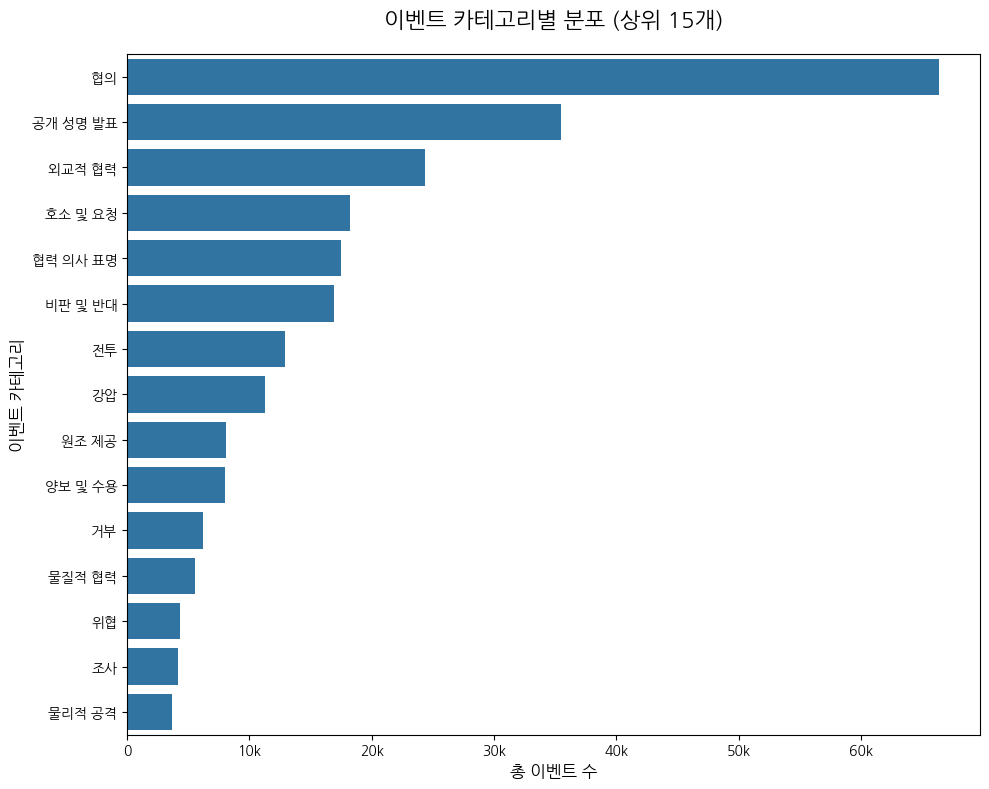

‚úÖ ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏÉùÏÑ± ÏôÑÎ£å.

'Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Î∂ÑÌè¨' Ìä∏Î¶¨Îßµ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§...


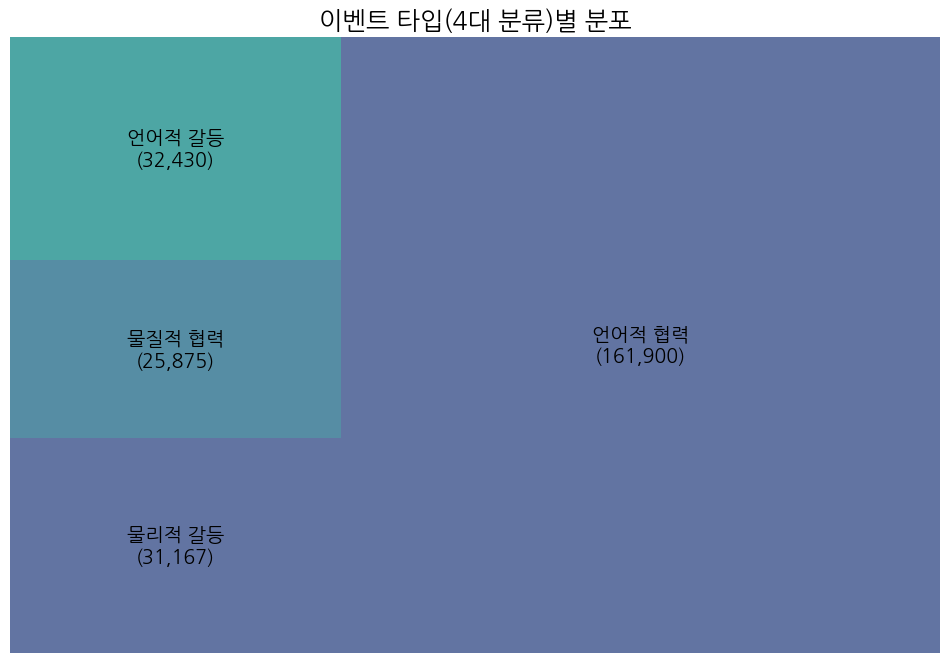

‚úÖ Ìä∏Î¶¨Îßµ ÏÉùÏÑ± ÏôÑÎ£å.


In [2]:
import sys
import os

# --- 0Îã®Í≥Ñ: Î™®Îì† ÌïÑÏàò Python ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò ---
print("ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏÑ§ÏπòÌï©ÎãàÎã§...")
!{sys.executable} -m pip install matplotlib seaborn squarify
print("‚úÖ Python ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨(matplotlib, seaborn, squarify) ÏÑ§Ïπò ÏôÑÎ£å.")


# --- ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ ---
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import squarify
from pyspark.sql.functions import sum as spark_sum
from matplotlib.ticker import FuncFormatter


# --- 1Îã®Í≥Ñ: ÏãúÏä§ÌÖú Ìå®ÌÇ§ÏßÄ Î™©Î°ù ÏóÖÎç∞Ïù¥Ìä∏ Î∞è ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò ---
print("\nÏãúÏä§ÌÖú Ìå®ÌÇ§ÏßÄ Î™©Î°ùÏùÑ ÏµúÏã† ÏÉÅÌÉúÎ°ú ÏóÖÎç∞Ïù¥Ìä∏Ìï©ÎãàÎã§...")
os.system("apt-get -qq update")
print("ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ ÏÑ§ÏπòÎ•º ÏãúÏûëÌï©ÎãàÎã§...")
os.system("apt-get -qq -y install fonts-nanum")
print("‚úÖ Ìè∞Ìä∏ ÏÑ§Ïπò ÏôÑÎ£å.")

# --- 2Îã®Í≥Ñ: Matplotlib Ìè∞Ìä∏ Ï∫êÏãú Ïû¨Íµ¨ÏÑ± ---
print("\nMatplotlibÏùò Ìè∞Ìä∏ Ï∫êÏãúÎ•º Ïû¨Íµ¨ÏÑ±Ìï©ÎãàÎã§...")
try:
    # Ïù¥Ï†Ñ Î≤ÑÏ†Ñ Ìò∏ÌôòÏÑ±ÏùÑ ÏúÑÌï¥ _rebuild()Î•º Î®ºÏ†Ä ÏãúÎèÑ
    fm._rebuild()
except AttributeError:
    # ÏµúÏã† Î≤ÑÏ†ÑÏóêÏÑúÎäî Ï∫êÏãúÎ•º ÏßÅÏ†ë ÏÇ≠Ï†ú
    import matplotlib

    cache_dir = matplotlib.get_cachedir()
    if os.path.exists(cache_dir):
        os.system(f"rm -rf {cache_dir}/*")
print("‚úÖ Ï∫êÏãú Ïû¨Íµ¨ÏÑ± ÏôÑÎ£å.")


# --- 3Îã®Í≥Ñ: Matplotlib Í∏∞Î≥∏ Ìè∞Ìä∏ ÏÑ§Ï†ï ---
try:
    plt.rc("font", family="NanumGothic")
    plt.rcParams["axes.unicode_minus"] = False
    print("\n‚úÖ MatplotlibÏóê 'NanumGothic' Ìè∞Ìä∏Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Îì±Î°ùÌñàÏäµÎãàÎã§.")

    # --- 4Îã®Í≥Ñ: Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Ï§ÄÎπÑ ---
    table_name = "gold_dev.gold_daily_events_category"
    print(f"\n'{table_name}' ÌÖåÏù¥Î∏îÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏòµÎãàÎã§...")
    df = spark.table(table_name)

    # ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú Ïª¨ÎüºÎßå ÏÑ†ÌÉùÌïòÏó¨ PandasÎ°ú Î≥ÄÌôò (ÎÇ†Ïßú ÌÉÄÏûÖ Î≥ÄÌôò Ïò§Î•ò Î∞©ÏßÄ)
    pandas_df = df.select(
        "mp_quad_class", "mp_event_categories", "event_count"
    ).toPandas()
    print("‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è Î≥ÄÌôò ÏôÑÎ£å.")

    # --- 5Îã®Í≥Ñ: Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨ (Í∞ÄÎ°ú ÎßâÎåÄÍ∑∏ÎûòÌîÑ) ---
    print("\n'Ïπ¥ÌÖåÍ≥†Î¶¨ Î≥Ñ Ïù¥Î≤§Ìä∏ Î∂ÑÌè¨' ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§...")

    category_agg = (
        pandas_df.groupby("mp_event_categories")["event_count"].sum().reset_index()
    )
    category_agg = category_agg.sort_values(by="event_count", ascending=False).head(15)

    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(
        x="event_count", y="mp_event_categories", data=category_agg, orient="h"
    )
    plt.title("Ïù¥Î≤§Ìä∏ Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ Î∂ÑÌè¨ (ÏÉÅÏúÑ 15Í∞ú)", fontsize=16, pad=20)
    plt.xlabel("Ï¥ù Ïù¥Î≤§Ìä∏ Ïàò", fontsize=12)
    plt.ylabel("Ïù¥Î≤§Ìä∏ Ïπ¥ÌÖåÍ≥†Î¶¨", fontsize=12)

    def format_k(x, pos):
        return f"{x*1e-3:,.0f}k" if x > 0 else "0"

    formatter = FuncFormatter(format_k)
    barplot.xaxis.set_major_formatter(formatter)

    plt.tight_layout()
    plt.show()
    print("‚úÖ ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏÉùÏÑ± ÏôÑÎ£å.")

    # --- 6Îã®Í≥Ñ: Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Î∂ÑÌè¨ (Ìä∏Î¶¨Îßµ) ---
    print("\n'Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ Î∂ÑÌè¨' Ìä∏Î¶¨Îßµ ÏãúÍ∞ÅÌôîÎ•º ÏãúÏûëÌï©ÎãàÎã§...")

    quad_class_agg = (
        pandas_df.groupby("mp_quad_class")["event_count"].sum().reset_index()
    )

    sizes = quad_class_agg["event_count"]
    labels = quad_class_agg.apply(
        lambda x: f"{x['mp_quad_class']}\n({x['event_count']:,})", axis=1
    )

    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, text_kwargs={"fontsize": 14})

    plt.title("Ïù¥Î≤§Ìä∏ ÌÉÄÏûÖ(4ÎåÄ Î∂ÑÎ•ò)Î≥Ñ Î∂ÑÌè¨", fontsize=18)
    plt.axis("off")
    plt.show()
    print("‚úÖ Ìä∏Î¶¨Îßµ ÏÉùÏÑ± ÏôÑÎ£å.")

except Exception as e:
    print(f"‚ùå Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò§Í±∞ÎÇò ÏãúÍ∞ÅÌôîÌïòÎäî Ï§ë Ïò§Î•òÍ∞Ä Î∞úÏÉùÌñàÏäµÎãàÎã§: {e}")

### Gold_devÏùò Î™®Îì† ÌÖåÏù¥Î∏î ÌÅ¨Í∏∞ ÌôïÏù∏Ïö©

In [6]:
schema_name = "gold_dev"

try:
    # --- ÏßÄÏ†ïÎêú Ïä§ÌÇ§ÎßàÏùò Î™®Îì† ÌÖåÏù¥Î∏î Î™©Î°ùÏùÑ Í∞ÄÏ†∏ÏòµÎãàÎã§. ---
    tables_df = spark.sql(f"SHOW TABLES IN {schema_name}")

    # DataFrameÏóêÏÑú ÌÖåÏù¥Î∏î Ïù¥Î¶ÑÎßå Ï∂îÏ∂úÌïòÏó¨ Python Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
    table_names = [row.tableName for row in tables_df.collect()]

    if not table_names:
        print(f"‚ÑπÔ∏è '{schema_name}' Ïä§ÌÇ§ÎßàÏóêÏÑú ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    else:
        print(
            f"ü•á '{schema_name}' Ïä§ÌÇ§ÎßàÏóêÏÑú Ï¥ù {len(table_names)}Í∞úÏùò ÌÖåÏù¥Î∏îÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§.\n"
        )

    # --- Î∞òÎ≥µÎ¨∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÌÖåÏù¥Î∏îÏùò Ï†ïÎ≥¥Î•º Ï°∞ÌöåÌïòÍ≥† Ï∂úÎ†•Ìï©ÎãàÎã§. ---
    for table in table_names:
        full_table_name = f"{schema_name}.{table}"
        print(f"ÌÖåÏù¥Î∏îÎ™Ö: {full_table_name}")

        try:
            df = spark.table(full_table_name)
            row_count = df.count()
            col_count = len(df.columns)
            print(f" - Ìñâ(Row)Ïùò Ïàò: {row_count:,} Í∞ú")
            print(f" - Ïó¥(Column)Ïùò Ïàò: {col_count} Í∞ú\n")

        except Exception as e:
            print(f"‚ùå ÌÖåÏù¥Î∏î '{full_table_name}' Ï°∞Ìöå Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}\n")

except Exception as e:
    print(f"‚ùå Ïä§ÌÇ§Îßà '{schema_name}'Ïùò ÌÖåÏù¥Î∏î Î™©Î°ùÏùÑ Í∞ÄÏ†∏Ïò§Îäî Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

ü•á 'gold_dev' Ïä§ÌÇ§ÎßàÏóêÏÑú Ï¥ù 4Í∞úÏùò ÌÖåÏù¥Î∏îÏùÑ Î∞úÍ≤¨ÌñàÏäµÎãàÎã§.

ÌÖåÏù¥Î∏îÎ™Ö: gold_dev.gold_daily_detailed_events


 - Ìñâ(Row)Ïùò Ïàò: 258,338 Í∞ú
 - Ïó¥(Column)Ïùò Ïàò: 81 Í∞ú

ÌÖåÏù¥Î∏îÎ™Ö: gold_dev.gold_daily_events_category
 - Ìñâ(Row)Ïùò Ïàò: 8,501 Í∞ú
 - Ïó¥(Column)Ïùò Ïàò: 8 Í∞ú

ÌÖåÏù¥Î∏îÎ™Ö: gold_dev.gold_near_realtime_summary


 - Ìñâ(Row)Ïùò Ïàò: 1,137 Í∞ú
 - Ïó¥(Column)Ïùò Ïàò: 16 Í∞ú

ÌÖåÏù¥Î∏îÎ™Ö: gold_dev.gold_superset_view


 - Ìñâ(Row)Ïùò Ïàò: 252,909 Í∞ú
 - Ïó¥(Column)Ïùò Ïàò: 15 Í∞ú



### Spark ÏÑ∏ÏÖò Ï¢ÖÎ£å

In [ ]:
spark.stop()
print("\n‚úÖ Spark ÏÑ∏ÏÖòÏù¥ Ï¢ÖÎ£åÎêòÏóàÏäµÎãàÎã§.")